<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f4f4f4; 
    border-radius: 10px; 
    align-items: center;">

<h1 style="margin: 0; color: #4CAF50;">Tabellarische Daten: Ein Beispiel</h1>
<h2 style="margin: 5px 0; color: #555;">DSAI</h2>
<h3 style="margin: 5px 0; color: #555;">Jakob Eggl</h3>

<div style="flex-shrink: 0;">
    <img src="https://www.htl-grieskirchen.at/wp/wp-content/uploads/2022/11/logo_bildschirm-1024x503.png" alt="Logo" style="width: 250px; height: auto;"/>
</div>
<p1> © 2024/25 Jakob Eggl. Nutzung oder Verbreitung nur mit ausdrücklicher Genehmigung des Autors.</p1>
</div>
<div style="flex: 1;">
</div>   

# Ein Beispiel

Wählen Sie eines das folgende Dataset. Verwenden Sie bitte die Versionen, die auf Eduvidual bereitgestellt sind! (Die Links sind als Informationsquelle und als Referenzangabe angedacht).

* Insurance `insurance.csv` (verwendet von https://www.kaggle.com/datasets/owaiskhan9654/health-insurance-lead-prediction-raw-data)

Wiederholen Sie nun jene Schritte der letzten beiden Stunden, die Sie für notwendig halten. Begründen Sie die Entscheidungen! Untersuchen und vorverarbeiten Sie dabei die gegebenen Daten (Visualisierungen sind nicht notwendig, diese werden erst später behandelt). Dokumentieren Sie Auffälligkeiten und Erkenntnisse.

Beachten Sie dabei insbesondere folgende Punkte (wählen Sie aber auch weitere Schritte, welche Sie für sinnvoll halten, basierend auf den besprochenen Möglichkeiten der letzten Stunden):
* Um was geht es bei dem Dataset?x
* Welche Features gibt es?x
* Gibt es ein offensichtliches Label? Würden andere Spalten als Label auch Sinn machen? (Können auch numerisch, i.e. *float* sein)!x
* Gibt es nominale, quantitative oder ordinale Spalten? Müssen diese umgerechnet werden?x
* Wie gut ist die Datenqualität (NaN, Sanity Check, etc.) -> Wie gehen Sie mit diesen Daten um?x
* Normalisieren Sie geeignete Spalten und speichern Sie diese in einer neuen Spalte. Welche Normalisierungsmethode wählen Sie und warum?x
* Ist das Aggregieren sinnvoll? Wenden Sie auch eine Aggregierungsmehtode an um zBsp die Initialen von einem Namen herauszufinden oder ähnliches.
* Welche Gruppierungen würden ggf. Sinn machen?
* Falls möglich "erfinden" Sie ein weiteres Dataframe, welches Sie mergen können
* etc.

Dokumentieren Sie sämtliche Ergebnisse, indem Sie auch diese Zellen im Notebook belassen, welche keine zufriedenstellenden Ergebnisse liefern.

In [1]:
# Import Required Libraries
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
import sklearn.linear_model as lm
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:

# Load Dataset
path = os.path.join("..", "..", "_data", "insurance.csv")
df = pd.read_csv(path)


## Um was geht es bei dem Dataset?

Das Dataset bezieht sich auf Versicherungsdaten. Es enthält Informationen über verschiedene Versicherungsnehmer, einschließlich ihrer Altersgruppen, Wohnsituation, Art der empfohlenen Versicherung, Gesundheitsindikatoren und mehr. Ziel ist es, die Prämien und die Wahrscheinlichkeit einer positiven Antwort auf ein Versicherungsangebot zu analysieren.<br>
Response -> Die Person hat eine Versicherung abgeschlossen

In [3]:
# Understand the Dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  \
0   1        C3         3213            Rented          Individual         36   
1   2        C5         1117             Owned               Joint         75   
2   3        C5         3732             Owned          Individual         32   
3   4       C24         4378             Owned               Joint         52   
4   5        C8         2190            Rented          Individual         44   

   Lower_Age Is_Spouse Health Indicator Holding_Policy_Duration  \
0         36        No               X1                     14+   
1         22        No               X2                     NaN   
2         32        No              NaN                     1.0   
3         48        No               X1                     14+   
4         44        No               X2                     3.0   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  Response  
0     

In [4]:
print("\nSummary statistics of the dataset:")
print(df.info())


Summary statistics of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null 

In [5]:

print("\nData types of each column:")
print(df.dtypes)
print(df.dtypes.count())


Data types of each column:
ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object
14


## Welche Features gibt es?

In [6]:
# Identify Features and Labels
features = df.columns.tolist()
print("\nFeatures in the dataset:")
print(features)



Features in the dataset:
['ID', 'City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response']


## Was ist ein offensichtliches Label

In [7]:
# Ein offensichtliches Label ist die Spalte Response-> ob die Person eine Versicherung abgeschlossen hat oder nicht
label = 'Response'
print("\nLabel in the dataset:")
print(label)


Label in the dataset:
Response


# Gibt es nominale, quantitative oder ordinale Spalten? Müssen diese umgerechnet werden?



* ### Quantitative Spalten: Diese Spalten enthalten numerische Werte, die eine natürliche Reihenfolge und Abstände haben. ->Können nominalisiert werden
Man kann damit fertig rechen -> eventuell nominalisieren
<br><br>
Upper_Age <br>
Lower_Age <br>
Reco_Policy_Premium <br>

* ### Ordinale Spalten: Diese Spalten enthalten Kategorien mit einer natürlichen Reihenfolge.
Man kann einteilen und es gibt eine Reihenfolge-> eventuell Umrechnen
<br><br>
Holding_Policy_Duration<br>
Reco_Policy_Cat

* ### Nominale Spalten: Diese Spalten enthalten Kategorien ohne eine natürliche Reihenfolge.
Man kann einteilen, aber keine Reihenfolge -> eventuell Umrechnen
<br><br>
City_Code <br>
Region_Code <br>
Accomodation_Type <br>
Reco_Insurance_Type <br>
Is_Spouse <br>
Health Indicator <br>
Holding_Policy_Type <br>
Response (binär) <br>

# Wie gut ist die Datenqualität (NaN, etc.) -> Wie gehen Sie mit diesen Daten um?


In [8]:
# Data Quality Check
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64


In [22]:
# Handle missing values (if any)
# For simplicity, let's drop rows with missing values
print(df.count().max())
df = df.dropna()
print(df.count().max())

23548
23548


<function print>

## Normalisieren Sie geeignete Spalten und speichern Sie diese in einer neuen Spalte. Welche Normalisierungsmethode wählen Sie und warum?
MinMaxScaler->Minimalwert und Maximalwert aus der Spalte wird zu 0 und 1

In [10]:
# Normalize Data
quantitative_columns = ['Upper_Age', 'Lower_Age', 'Reco_Policy_Premium']
quantitative_columns_normalized = ['Upper_Age_Normalized', 'Lower_Age_Normalized', 'Reco_Policy_Premium_Normalized']
scaler = MinMaxScaler()
df[quantitative_columns_normalized] = scaler.fit_transform(df[quantitative_columns])
df

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Upper_Age_Normalized,Lower_Age_Normalized,Reco_Policy_Premium_Normalized
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0,0.277778,0.338983,0.209596
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0,0.574074,0.542373,0.362881
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0,0.425926,0.474576,0.179098
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1,0.574074,0.610169,0.300191
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1,1.000000,0.966102,0.651013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50875,50876,C6,231,Rented,Individual,36,36,No,X3,2.0,1.0,20,13574.0,1,0.277778,0.338983,0.258083
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0,0.111111,0.186441,0.054616
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0,0.777778,0.796610,0.203267
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1,0.925926,0.559322,0.621990


## Ist das Aggregieren sinnvoll? Wenden Sie auch eine Aggregierungsmethode an um zBsp die Initialen von einem Namen herauszufinden oder ähnliches.


In [11]:
# Aggregation
df['Accomodation_Type_Short'] = df['Accomodation_Type'].apply(lambda x: x[0])
df


Mean charges by region:


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Upper_Age_Normalized,Lower_Age_Normalized,Reco_Policy_Premium_Normalized,Accomodation_Type_Short
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0,0.277778,0.338983,0.209596,R
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0,0.574074,0.542373,0.362881,O
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0,0.425926,0.474576,0.179098,R
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1,0.574074,0.610169,0.300191,R
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1,1.000000,0.966102,0.651013,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50875,50876,C6,231,Rented,Individual,36,36,No,X3,2.0,1.0,20,13574.0,1,0.277778,0.338983,0.258083,R
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0,0.111111,0.186441,0.054616,R
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0,0.777778,0.796610,0.203267,R
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1,0.925926,0.559322,0.621990,O


## Welche Gruppierungen würden ggf. Sinn machen?
Mit City_Code gruppieren

In [12]:
#Group by City_Code and get The count of Positive Responses
grouped_df = df.groupby('City_Code').agg({'Response': 'sum'}).reset_index().sort_values('Response', ascending=False)
grouped_df

,City_Code,Response
0,C1,1085
11,C2,958
22,C3,544
30,C4,390
33,C7,227
35,C9,208
32,C6,205
34,C8,204
1,C10,175
31,C5,147


In [13]:
#Group by Holding_Policy_Duration and get The count of Positive Responses
grouped_df = df.groupby('Holding_Policy_Duration').agg({'Response': 'sum'}).reset_index().sort_values('Response', ascending=False)
grouped_df

,Holding_Policy_Duration,Response
5,14+,849
7,2.0,788
0,1.0,771
8,3.0,647
9,4.0,522
10,5.0,422
11,6.0,350
12,7.0,322
13,8.0,266
14,9.0,207


In [15]:
#Group by Holding_Policy_Duration and get The count of Positive Responses
grouped_df = df.groupby('Holding_Policy_Type').agg({'Response': 'sum'}).reset_index().sort_values('Response', ascending=False)
grouped_df

,Holding_Policy_Type,Response
2,3.0,2484
0,1.0,1528
1,2.0,873
3,4.0,815


In [16]:
#Group by Holding_Policy_Duration and get The count of Positive Responses
grouped_df = df.groupby('Accomodation_Type').agg({'Response': 'sum'}).reset_index().sort_values('Response', ascending=False)
grouped_df

,Accomodation_Type,Response
0,Owned,3509
1,Rented,2191


In [17]:
#Group by Holding_Policy_Duration and get The count of Positive Responses
grouped_df = df.groupby('Health Indicator').agg({'Response': 'sum'}).reset_index().sort_values('Response', ascending=False)
grouped_df

,Health Indicator,Response
0,X1,1891
1,X2,1528
2,X3,915
3,X4,885
4,X5,251
5,X6,166
6,X7,43
7,X8,13
8,X9,8


# Visualisierung

In [18]:
def linear_regression(data: pd.DataFrame, x: str, y: str) -> None:
    """
    Perform linear regression on data. Makes a legend cell which contains the function of the regression.
    """
    # Create linear regression object
    regr = lm.LinearRegression()

    # Train the model using the training sets
    regr.fit(data[x].values.reshape(-1, 1), data[y])

    # Make predictions using the testing set
    y_pred = regr.predict(data[x].values.reshape(-1, 1))

    # Plot outputs
    plt.scatter(data[x], data[y])
    plt.plot(data[x], y_pred, color='blue', linewidth=3)

    # Add legend
    plt.legend([f"y = {regr.coef_[0]:.2f}x + {regr.intercept_:.2f}"])

    # add axis labels
    plt.xlabel(x)
    plt.ylabel(y)

    plt.show()

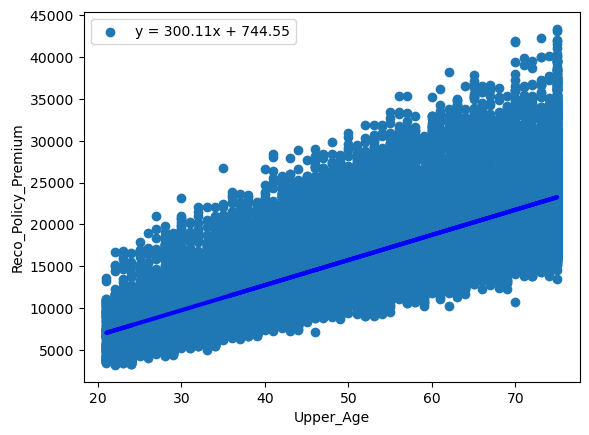

In [19]:
linear_regression(df, 'Upper_Age', 'Reco_Policy_Premium')

In [20]:
def plot_pairplot(data, hue, palette, columns):
    sns.pairplot(data, hue=hue, palette=palette, vars=columns)

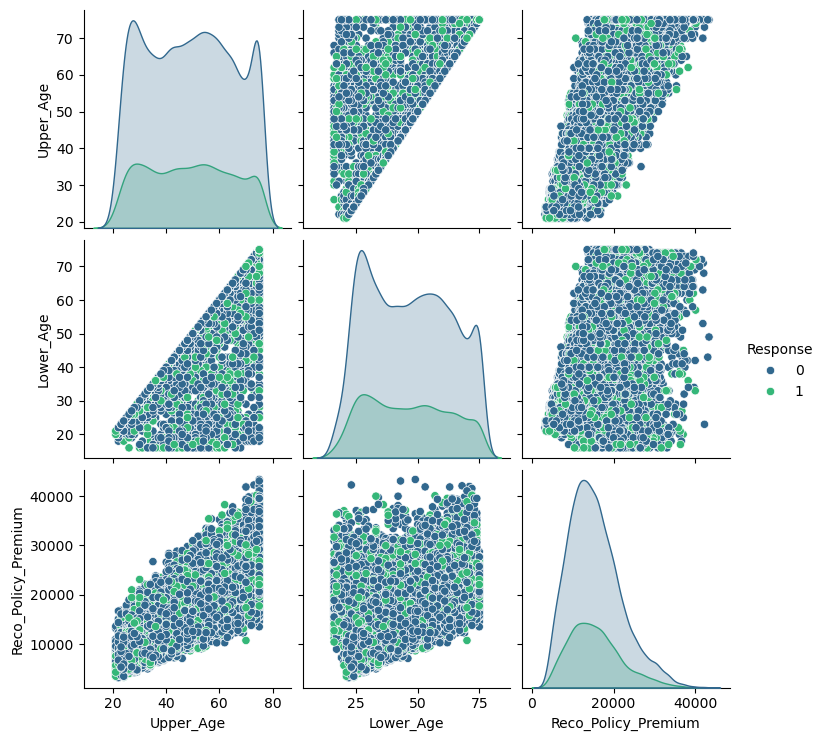

In [21]:
plot_pairplot(df, 'Response', 'viridis', ['Upper_Age', 'Lower_Age', 'Reco_Policy_Premium'])